In [1]:
import kabuki
import hddm
import numpy as np
import pandas as pd

from numpy.random import rand
from scipy.stats import uniform, norm
from copy import copy
from hddm.generate import _gen_rts_from_simulated_drift
import matplotlib.pyplot as plt
import seaborn as sns

/home/jasongong/.local/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# simulate the RTs using HDDM packages
# setting parameters for a, v, z, t

sim_drift = _gen_rts_from_simulated_drift
params = {"a": 1, "v": 0.5, "z": 0.5, "t": 0.1}
sim = sim_drift(params)
upper = sim[0][sim[0] > 0]
lower = sim[0][sim[0] < 0]
lower = -lower

# Figure 1

/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


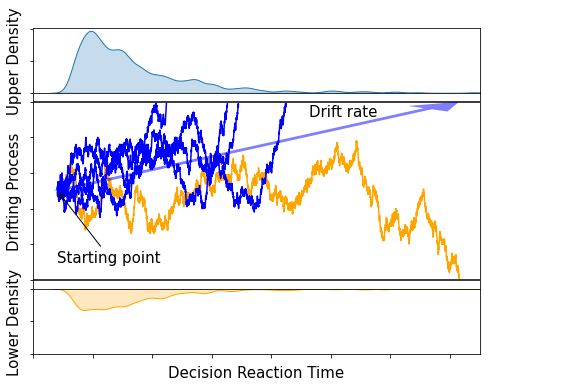

In [3]:

fig, ax = plt.subplots(3,1,figsize=(8,6), gridspec_kw={'height_ratios': [1, 3, 1]})

ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])


for i in range(5):
# ax[1].arrow(0, 0.5, 0.4, 0.5, length_includes_head=True,
#           head_width=0.05, head_length=0.05, width=.01,
#            facecolor='blue', edgecolor='none', zorder=9, alpha=0.5)

# ax[1].text(0.27, 0.94, "drift rate")

# ax[1].annotate("starting point", xy=(0, 0.5), xytext=(0, 0.1), arrowprops=dict(arrowstyle="->"))

# ax[1].annotate("upper boundary", xy=(0.5, 1), xytext=(0.4, 0.9), arrowprops=dict(arrowstyle="->"))

# ax[1].annotate("lower boundary", xy=(0.5, 0), xytext=(0.4, 0.1), arrowprops=dict(arrowstyle="->"))

# circle1 = plt.Circle((0, 0.5), 0.01, color='black', zorder=10)
# ax[1].add_patch(circle1)

    if sim[1][i][-1] > 0.5:
        color = "blue"
    else:
        color = "orange"
    y = sim[1][i][1000:]
    length = len(y)
    x = np.linspace(0, length*0.0001, num=length)
    ax[1].plot(x, y, color=color)

ax[1].axhline(y=1, color='black', linestyle='-')
ax[1].axhline(y=0, color='black', linestyle='-')

sns.kdeplot(upper , bw = 0.1 , fill = True, ax=ax[0])
sns.kdeplot(lower , bw = 0.1 , fill = True,color="orange", ax=ax[2])

ax[0].set_ylabel("Upper Density", fontsize=15)
ax[1].set_ylabel("Drifting Process", fontsize=15)
ax[2].set_ylabel("Lower Density", fontsize=15)

ax[2].set_xlabel("Decision Reaction Time", fontsize=15)

ax[0].set_xlim([0, 1.5])
ax[2].set_xlim([0, 1.5])
ax[2].set_ylim([0, 10])

ax[2].invert_yaxis()

ax[1].arrow(0, 0.5, 0.4, 0.5, length_includes_head=True,
          head_width=0.05, head_length=0.05, width=.01,
           facecolor='blue', edgecolor='none', zorder=9, alpha=0.5)

ax[1].text(0.25, 0.92, "Drift rate", fontsize = 15)

ax[1].annotate("Starting point", xy=(0, 0.5), fontsize = 15, 
               xytext=(0, 0.1), arrowprops=dict(arrowstyle="->"))

ax[1].annotate("Upper boundary", xy=(0.5, 1), fontsize = 15, 
               xytext=(0.4, 0.9), arrowprops=dict(arrowstyle="->"))

ax[1].annotate("Lower boundary", xy=(0.5, 0), fontsize = 15, 
               xytext=(0.4, 0.1), arrowprops=dict(arrowstyle="->"))



plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# plot figure S1 - the RT distributions

In [5]:
# load data for study 1
data_study1 = hddm.load_csv('data/study1.csv')
data_study1 = hddm.utils.flip_errors(data_study1)

Text(0.5, 0.04, 'Study 1')

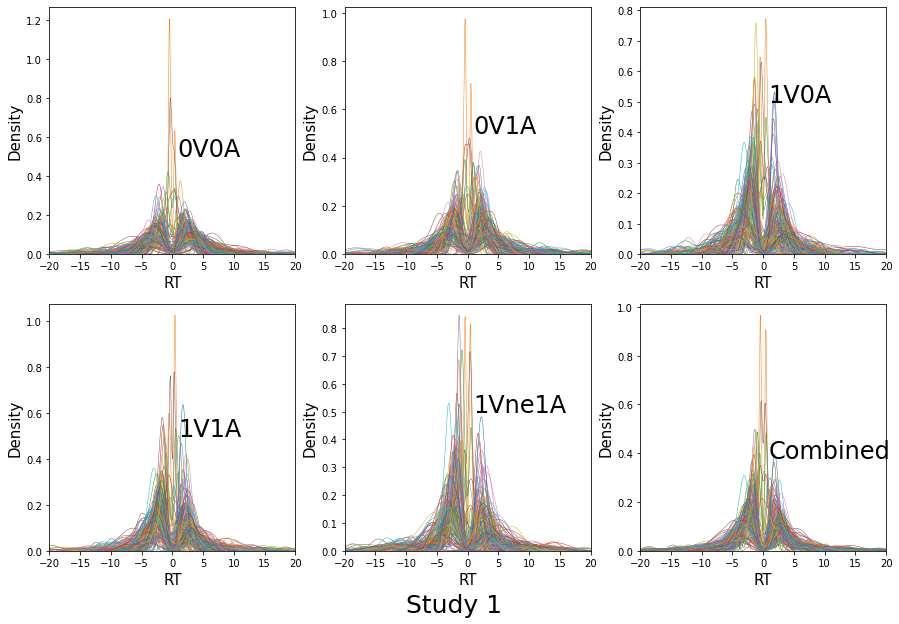

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

k = 0
for i, stim_data in data_study1.groupby('stim'):
    
    ax[k//3, k%3].set_xlim([-20, 20])
    ax[k//3, k%3].set_xlabel("RT", fontsize=15)
    ax[k//3, k%3].set_ylabel("Density", fontsize=15)
    ax[k//3, k%3].text(0.9, 0.5, i, fontsize=24)
    
    for j, subj_data in stim_data.groupby('subj_idx'):
        sns.kdeplot(subj_data.rt, fill = False,bw_adjust=.4,
                    linewidth=0.5,alpha=0.1, ax=ax[k//3, k%3])
        
    k = k + 1

ax[1, 2].set_xlim([-20, 20])
ax[1, 2].set_xlabel("RT", fontsize=15)
ax[1, 2].set_ylabel("Density", fontsize=15)
ax[1, 2].text(0.9, 0.38, "Combined", fontsize=24)
for j, subj_data in data_study1.groupby('subj_idx'):
    sns.kdeplot(subj_data.rt, fill = False,bw_adjust=.4,
                linewidth=0.5,alpha=0.1, ax=ax[1,2])

fig.text(0.5, 0.04, 'Study 1', ha='center', fontsize=25)

In [7]:
# load data for study 2
data_study2 = hddm.load_csv('data/study2.csv')
data_study2 = hddm.utils.flip_errors(data_study2)

Text(0.5, 0.04, 'Study 2')

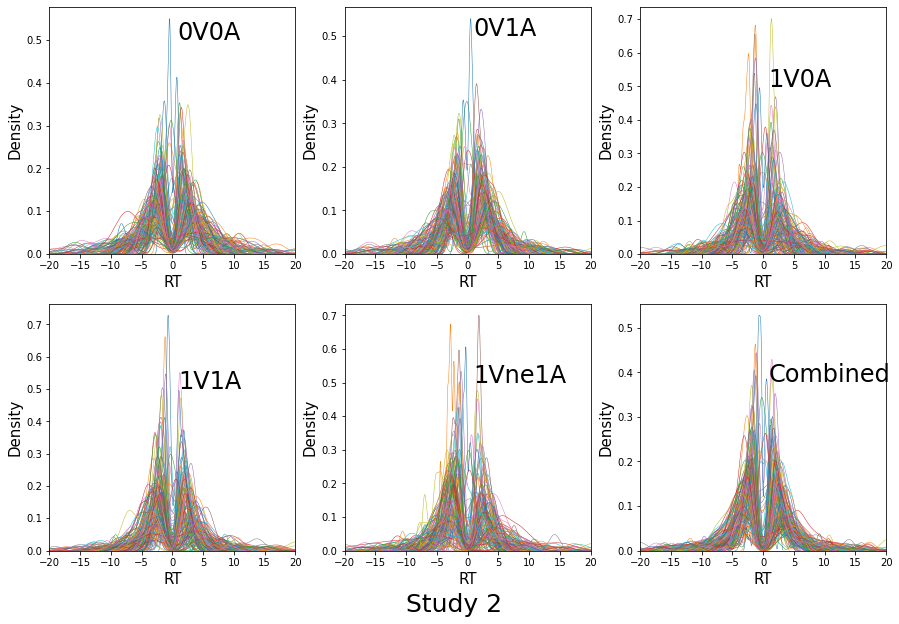

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

k = 0
for i, stim_data in data_study2.groupby('stim'):
    
    ax[k//3, k%3].set_xlim([-20, 20])
    ax[k//3, k%3].set_xlabel("RT", fontsize=15)
    ax[k//3, k%3].set_ylabel("Density", fontsize=15)
    ax[k//3, k%3].text(0.9, 0.5, i, fontsize=24)
    
    for j, subj_data in stim_data.groupby('subj_idx'):
        sns.kdeplot(subj_data.rt, fill = False,bw_adjust=.4,
                    linewidth=0.5,alpha=0.1, ax=ax[k//3, k%3])
        
    k = k + 1

ax[1, 2].set_xlim([-20, 20])
ax[1, 2].set_xlabel("RT", fontsize=15)
ax[1, 2].set_ylabel("Density", fontsize=15)
ax[1, 2].text(0.9, 0.38, "Combined", fontsize=24)
for j, subj_data in data_study2.groupby('subj_idx'):
    sns.kdeplot(subj_data.rt, fill = False,bw_adjust=.4,
                linewidth=0.5,alpha=0.1, ax=ax[1,2])

fig.text(0.5, 0.04, 'Study 2', ha='center', fontsize=25)


# plot Figure 2 - Results of study 1

In [2]:
# load the dataframe for plotting
study_1_cor_confi = pd.read_csv("study1_correlation_traces.csv")
study_1_ddm_confi = pd.read_csv("study_1_ddm_confirmative_analysis.csv")
study_1_reg_explo = pd.read_csv("study_1_ddm_exploratory_analysis.csv")

## plot Figure 2A - confirmatory analaysis

In [3]:
v_0V0A = study_1_ddm_confi.v_0V0A
v_1V0A = study_1_ddm_confi.v_1V0A
v_0V1A = study_1_ddm_confi.v_0V1A
v_1V1A = study_1_ddm_confi.v_1V1A
v_1Vne1A = study_1_ddm_confi.v_1Vne1A

Text(0.1, -0.09, 'A')

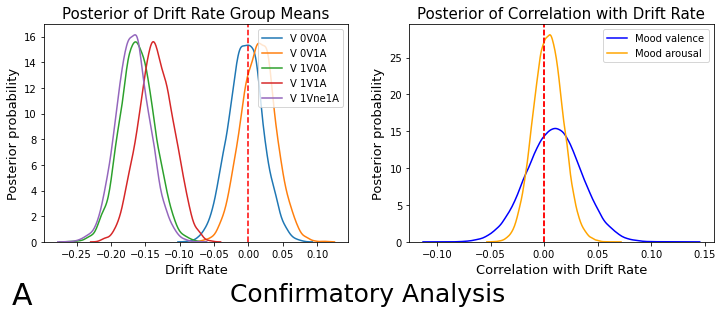

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.kdeplot(v_0V0A, label='V 0V0A', ax=ax[0])
sns.kdeplot(v_0V1A, label='V 0V1A', ax=ax[0])
sns.kdeplot(v_1V0A, label='V 1V0A', ax=ax[0])
sns.kdeplot(v_1V1A, label='V 1V1A', ax=ax[0])
sns.kdeplot(v_1Vne1A, label='V 1Vne1A', ax=ax[0])

plt.axvline(x=0,c = 'r', ls='--')
ax[0].legend()


ax[0].axvline(x=0,c = 'r', ls='--')
ax[0].set_xlabel('Drift Rate', fontsize=13)
ax[0].set_ylabel('Posterior probability', fontsize=13)
ax[0].set_title('Posterior of Drift Rate Group Means', fontsize=15)

sns.kdeplot(study_1_cor_confi.cor_valence, label="Mood valence", color='b')
sns.kdeplot(study_1_cor_confi.cor_arousal, label="Mood arousal", color='orange')
ax[1].axvline(x=0,c = 'r', ls='--')
ax[1].set_xlabel('Correlation with Drift Rate', fontsize=13)
ax[1].set_ylabel('Posterior probability', fontsize=13)
ax[1].set_title('Posterior of Correlation with Drift Rate', fontsize=15)
ax[1].legend()


fig.text(0.5, -0.08, 'Confirmatory Analysis', ha='center',fontsize=25)
fig.text(0.1, -0.09, 'A', ha='center',fontsize=30)

## plot Figure 2B Exploratory Analysis

In [13]:
v_intercept = study_1_reg_explo.v_intercept
v_movie_valence = study_1_reg_explo.v_movie_valence
v_movie_arousal = study_1_reg_explo.v_movie_arousal
v_movie_valence_movie_arousal = study_1_reg_explo.v_movie_valence_movie_arousal
a_intercept = study_1_reg_explo.a_intercept
a_movie_valence = study_1_reg_explo.a_movie_valence
a_movie_arousal = study_1_reg_explo.a_movie_arousal
a_movie_valence_movie_arousal = study_1_reg_explo.a_movie_valence_movie_arousal
t_intercept = study_1_reg_explo.t_intercept
t_movie_valence = study_1_reg_explo.t_movie_valence
t_movie_arousal = study_1_reg_explo.t_movie_arousal
t_movie_valence_movie_arousal = study_1_reg_explo.t_movie_valence_movie_arousal
z_movie_valence = study_1_reg_explo.z_movie_valence
z_movie_arousal = study_1_reg_explo.z_movie_arousal
z_movie_valence_movie_arousal = study_1_reg_explo.z_movie_valence_movie_arousal

Text(0.1, 0.01, 'B')

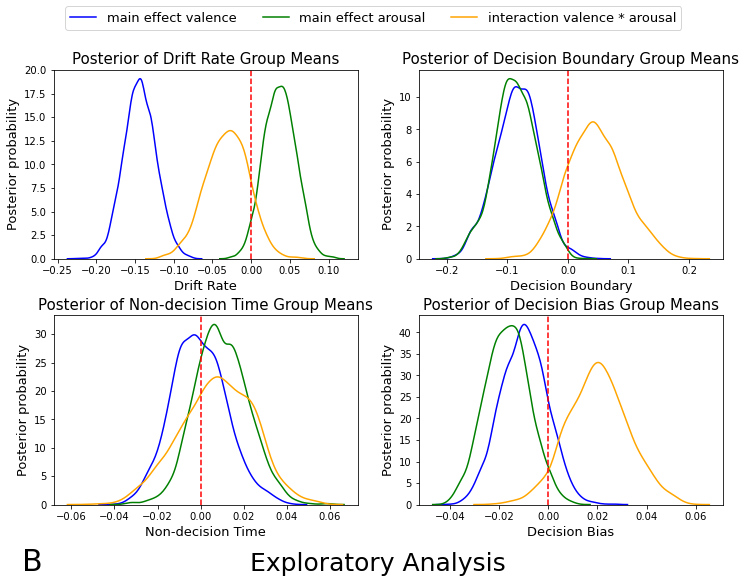

In [14]:
fig, ax = plt.subplots(2,2,figsize=(12,8))


sns.kdeplot(v_movie_valence,ax=ax[0,0], label="main effect valence", color='b')
sns.kdeplot(v_movie_arousal,ax=ax[0,0], label="main effect arousal", color='green')
sns.kdeplot(v_movie_valence_movie_arousal,ax=ax[0,0], label="interaction valence * arousal", color='orange')

ax[0,0].axvline(x=0,c = 'r', ls='--')
ax[0,0].set_xlabel('Drift Rate', fontsize=13)
ax[0,0].set_ylabel('Posterior probability', fontsize=13)
ax[0,0].set_title('Posterior of Drift Rate Group Means', fontsize=15)


sns.kdeplot(a_movie_valence,ax=ax[0,1], label="main effect valence", color='b')
sns.kdeplot(a_movie_arousal,ax=ax[0,1], label="main effect arousal", color='green')
sns.kdeplot(a_movie_valence_movie_arousal,ax=ax[0,1], label="interaction valence * arousal", color='orange')

ax[0,1].axvline(x=0,c = 'r', ls='--')
ax[0,1].set_xlabel('Decision Boundary', fontsize=13)
ax[0,1].set_ylabel('Posterior probability', fontsize=13)
ax[0,1].set_title('Posterior of Decision Boundary Group Means', fontsize=15)


sns.kdeplot(t_movie_valence,ax=ax[1,0], label="main effect valence", color='b')
sns.kdeplot(t_movie_arousal,ax=ax[1,0], label="main effect arousal", color='green')
sns.kdeplot(t_movie_valence_movie_arousal,ax=ax[1,0], label="interaction valence * arousal", color='orange')

ax[1,0].axvline(x=0,c = 'r', ls='--')
ax[1,0].set_xlabel('Non-decision Time', fontsize=13)
ax[1,0].set_ylabel('Posterior probability', fontsize=13)
ax[1,0].set_title('Posterior of Non-decision Time Group Means', fontsize=15)


sns.kdeplot(z_movie_valence,ax=ax[1,1], label="main effect valence", color='b')
sns.kdeplot(z_movie_arousal,ax=ax[1,1], label="main effect arousal", color='green')
sns.kdeplot(z_movie_valence_movie_arousal,ax=ax[1,1], label="interaction valence * arousal", color='orange')

ax[1,1].axvline(x=0,c = 'r', ls='--')
ax[1,1].set_xlabel('Decision Bias', fontsize=13)
ax[1,1].set_ylabel('Posterior probability', fontsize=13)
ax[1,1].set_title('Posterior of Decision Bias Group Means', fontsize=15)


plt.subplots_adjust(wspace=0.2, hspace=.3)

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, prop={'size': 13})

fig.text(0.5, 0.01, 'Exploratory Analysis', ha='center',fontsize=25)
fig.text(0.1, 0.01, 'B', ha='center',fontsize=30)

# Plot for Figure 3 - results of study 2

## plot Figure 3A the regression model

In [16]:
study_2_reg = pd.read_csv("study2_full_regression_hypothesis.csv")

In [17]:
v_movie_valence = study_2_reg.v_movie_valence
v_mood_valence = study_2_reg.v_mood_valence
v_movie_arousal = study_2_reg.v_movie_arousal
v_mood_arousal = study_2_reg.v_mood_arousal
v_movie_valence_mood_valence = study_2_reg.v_movie_valence_mood_valence
v_movie_arousal_mood_arousal = study_2_reg.v_movie_arousal_mood_arousal
a_movie_valence = study_2_reg.a_movie_valence
a_mood_valence = study_2_reg.a_mood_valence
a_movie_arousal = study_2_reg.a_movie_arousal
a_mood_arousal = study_2_reg.a_mood_arousal
a_movie_valence_mood_valence = study_2_reg.a_movie_valence_mood_valence
a_movie_arousal_mood_arousal = study_2_reg.a_movie_arousal_mood_arousal
t_movie_valence = study_2_reg.t_movie_valence
t_mood_valence = study_2_reg.t_mood_valence
t_movie_arousal = study_2_reg.t_movie_arousal
t_mood_arousal = study_2_reg.t_mood_arousal
t_movie_valence_mood_valence = study_2_reg.t_movie_valence_mood_valence
t_movie_arousal_mood_arousal = study_2_reg.t_movie_arousal_mood_arousal
z_movie_valence = study_2_reg.z_movie_valence
z_mood_valence = study_2_reg.z_mood_valence
z_movie_arousal = study_2_reg.z_movie_arousal
z_mood_arousal = study_2_reg.z_mood_arousal
z_movie_valence_mood_valence = study_2_reg.z_movie_valence_mood_valence
z_movie_arousal_mood_arousal = study_2_reg.z_movie_arousal_mood_arousal

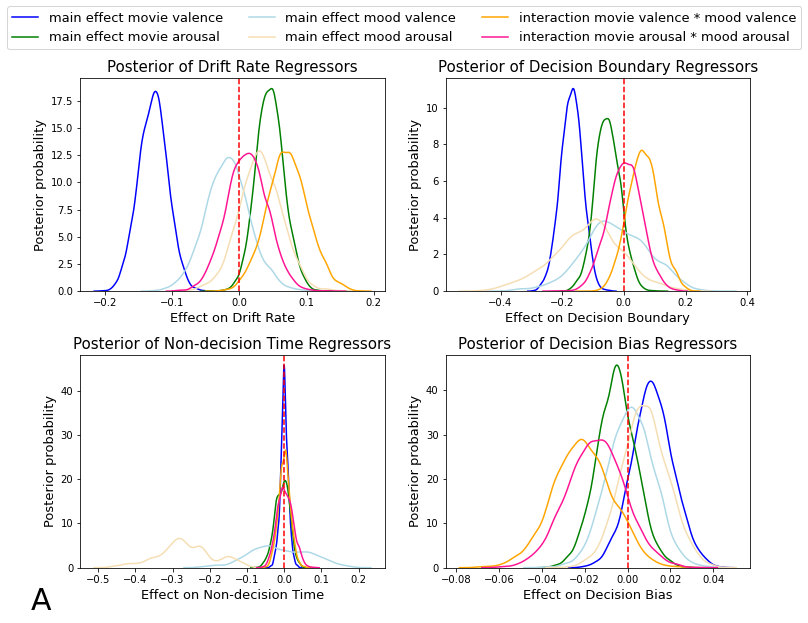

In [18]:
fig, ax = plt.subplots(2,2,figsize=(12,9))


sns.kdeplot(v_movie_valence,ax=ax[0,0], label="main effect movie valence", color='b')
sns.kdeplot(v_movie_arousal,ax=ax[0,0], label="main effect movie arousal", color='green')
sns.kdeplot(v_mood_valence,ax=ax[0,0], label="main effect mood valence", color='lightblue')
sns.kdeplot(v_mood_arousal,ax=ax[0,0], label="main effect mood arousal", color='wheat')
sns.kdeplot(v_movie_valence_mood_valence,ax=ax[0,0], label="interaction movie valence * mood valence", color='orange')
sns.kdeplot(v_movie_arousal_mood_arousal,ax=ax[0,0], label="interaction movie arousal * mood arousal", color='deeppink')

ax[0,0].axvline(x=0,c = 'r', ls='--')
ax[0,0].set_xlabel('Effect on Drift Rate', fontsize=13)
ax[0,0].set_ylabel('Posterior probability', fontsize=13)
ax[0,0].set_title('Posterior of Drift Rate Regressors', fontsize=15)


sns.kdeplot(a_movie_valence,ax=ax[0,1], label="main effect movie valence", color='b')
sns.kdeplot(a_movie_arousal,ax=ax[0,1], label="main effect movie arousal", color='green')
sns.kdeplot(a_mood_valence,ax=ax[0,1], label="main effect mood valence", color='lightblue')
sns.kdeplot(a_mood_arousal,ax=ax[0,1], label="main effect mood arousal", color='wheat')
sns.kdeplot(a_movie_valence_mood_valence,ax=ax[0,1], label="interaction movie valence * mood valence", color='orange')
sns.kdeplot(a_movie_arousal_mood_arousal,ax=ax[0,1], label="interaction movie arousal * mood arousal", color='deeppink')

ax[0,1].axvline(x=0,c = 'r', ls='--')
ax[0,1].set_xlabel('Effect on Decision Boundary', fontsize=13)
ax[0,1].set_ylabel('Posterior probability', fontsize=13)
ax[0,1].set_title('Posterior of Decision Boundary Regressors', fontsize=15)


sns.kdeplot(t_movie_valence,ax=ax[1,0], label="main effect movie valence", color='b')
sns.kdeplot(t_movie_arousal,ax=ax[1,0], label="main effect movie arousal", color='green')
sns.kdeplot(t_mood_valence,ax=ax[1,0], label="main effect mood valence", color='lightblue')
sns.kdeplot(t_mood_arousal,ax=ax[1,0], label="main effect mood arousal", color='wheat')
sns.kdeplot(t_movie_valence_mood_valence,ax=ax[1,0], label="interaction movie valence * mood valence", color='orange')
sns.kdeplot(t_movie_arousal_mood_arousal,ax=ax[1,0], label="interaction movie arousal * mood arousal", color='deeppink')

ax[1,0].axvline(x=0,c = 'r', ls='--')
ax[1,0].set_xlabel('Effect on Non-decision Time', fontsize=13)
ax[1,0].set_ylabel('Posterior probability', fontsize=13)
ax[1,0].set_title('Posterior of Non-decision Time Regressors', fontsize=15)


sns.kdeplot(z_movie_valence,ax=ax[1,1], label="main effect movie valence", color='b')
sns.kdeplot(z_movie_arousal,ax=ax[1,1], label="main effect movie arousal", color='green')
sns.kdeplot(z_mood_valence,ax=ax[1,1], label="main effect mood valence", color='lightblue')
sns.kdeplot(z_mood_arousal,ax=ax[1,1], label="main effect mood arousal", color='wheat')
sns.kdeplot(z_movie_valence_mood_valence,ax=ax[1,1], label="interaction movie valence * mood valence", color='orange')
sns.kdeplot(z_movie_arousal_mood_arousal,ax=ax[1,1], label="interaction movie arousal * mood arousal", color='deeppink')

ax[1,1].axvline(x=0,c = 'r', ls='--')
ax[1,1].set_xlabel('Effect on Decision Bias', fontsize=13)
ax[1,1].set_ylabel('Posterior probability', fontsize=13)
ax[1,1].set_title('Posterior of Decision Bias Regressors', fontsize=15)


plt.subplots_adjust(wspace=0.2, hspace=.3)

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, prop={'size': 13})

fig.text(0.08, 0.06, 'A', ha='center',fontsize=30)

plt.show()

## plot Figure 3B&C

In [21]:
trace_df = pd.read_csv("study2_cell_mean_trace_df.csv")
df_valence_all = trace_df.loc[trace_df.movie.isin(["0V0A", "1V0A"]),:]
df_arousal_all = trace_df.loc[trace_df.movie.isin(["0V0A", "0V1A"]),:]

Text(-0.85, -0.37, 'C')

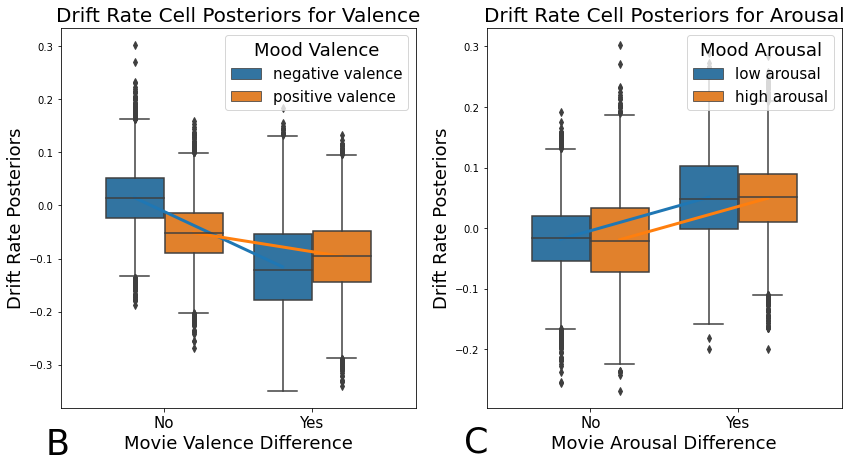

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

sns.boxplot(x="movie_valence", y="trace", hue="mood_valence", data=df_valence_all, palette=["C0", "C1"], ax=ax[0])
mean_1 = df_valence_all.trace.loc[(trace_df.mood_valence=="negative valence") & (trace_df.movie_valence=="negative valence")].mean()
mean_2 = df_valence_all.trace.loc[(trace_df.mood_valence=="negative valence") & (trace_df.movie_valence=="positive valence")].mean()
mean_3 = df_valence_all.trace.loc[(trace_df.mood_valence=="positive valence") & (trace_df.movie_valence=="negative valence")].mean()
mean_4 = df_valence_all.trace.loc[(trace_df.mood_valence=="positive valence") & (trace_df.movie_valence=="positive valence")].mean()

ax[0].plot([-0.2, 0.8], [mean_1, mean_2], '-', lw=3, color="C0")
ax[0].plot([0.2, 1.2], [mean_3, mean_4], '-', lw=3, color="C1")

ax[0].set_title("Drift Rate Cell Posteriors for Valence", fontsize=20)
ax[0].set_xlabel("Movie Valence Difference", fontsize=18)
ax[0].set_ylabel("Drift Rate Posteriors", fontsize=18)
ax[0].set_xticklabels(['No', 'Yes'], fontsize=15)
ax[0].legend(title="Mood Valence", title_fontsize=18, fontsize=15)
ax[0].text(-0.8, -0.47, "B", fontsize=35)

sns.boxplot(x="movie_arousal", y="trace", hue="mood_arousal", data=df_arousal_all, palette=["C0", "C1"], ax=ax[1])

mean_1 = df_arousal_all.trace.loc[(trace_df.mood_arousal=="low arousal") & (trace_df.movie_arousal=="low arousal")].mean()
mean_2 = df_arousal_all.trace.loc[(trace_df.mood_arousal=="low arousal") & (trace_df.movie_arousal=="high arousal")].mean()
mean_3 = df_arousal_all.trace.loc[(trace_df.mood_arousal=="high arousal") & (trace_df.movie_arousal=="low arousal")].mean()
mean_4 = df_arousal_all.trace.loc[(trace_df.mood_arousal=="high arousal") & (trace_df.movie_arousal=="high arousal")].mean()

ax[1].plot([-0.2, 0.8], [mean_1, mean_2], '-', lw=3, color="C0")
ax[1].plot([0.2, 1.2], [mean_3, mean_4], '-', lw=3, color="C1")

ax[1].set_title("Drift Rate Cell Posteriors for Arousal", fontsize=20)
ax[1].set_xlabel("Movie Arousal Difference", fontsize=18)
ax[1].set_ylabel("Drift Rate Posteriors", fontsize=18)
ax[1].set_xticklabels(['No', 'Yes'], fontsize=15)
ax[1].legend(title="Mood Arousal", title_fontsize=18, fontsize=15, loc=1)
ax[1].text(-0.85, -0.37, "C", fontsize=35)